In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data.head()

,Feature1,Feature2,Class
0,1.553817,-3.889541,2
1,0.763049,0.679543,0
2,-2.699726,-1.786020,1
3,-1.689092,-0.524644,1
4,-0.355032,-2.249036,1


In [4]:
X = data[["Feature1", "Feature2"]].values
Y = data[["Class"]].values

In [5]:
class NeuralNetwork(object):
  def __init__(self):
    inputLayerNeurons = 2
    hiddenLayer1Neurons = 10
    hiddenLayer2Neurons = 8
    outputLayerNeurons = 1

    self.learning_rate = 0.2
    self.W_H1I = np.random.randn(inputLayerNeurons, hiddenLayer1Neurons)
    self.W_H2H1 = np.random.randn(hiddenLayer1Neurons, hiddenLayer2Neurons)
    self.W_OH2 = np.random.randn(hiddenLayer2Neurons, outputLayerNeurons)

  def sigmoid(self,x,der = False):
    if der == True:
      return x * (1-x)
    return 1/(1+np.exp(-x))

  def feedForward(self,X):
    #
    hidden1_input = np.dot(X, self.W_H1I)
    self.hidden1_output = self.sigmoid(hidden1_input)

    #
    hidden2_input = np.dot(self.hidden1_output, self.W_H2H1)
    self.hidden2_output = self.sigmoid(hidden2_input)

    #
    output_input = np.dot(self.hidden2_output, self.W_OH2)
    pred = self.sigmoid(output_input)

    return pred


  def backPropagation(self,X,Y,pred):
    output_error = Y - pred # target - prediction
    output_delta = self.learning_rate * output_error * self.sigmoid(pred,der = True)

    hidden2_error = output_delta.dot(self.W_OH2.T)
    hidden2_delta = self.learning_rate * hidden2_error * self.sigmoid(self.hidden2_output, der=True)

    hidden1_error = hidden2_delta.dot(self.W_H2H1.T)
    hidden1_delta = self.learning_rate * hidden1_error * self.sigmoid(self.hidden1_output, der=True)

    self.W_OH2 += self.hidden2_output.T.dot(output_delta)
    self.W_H2H1 += self.hidden1_output.T.dot(hidden2_delta)
    self.W_H1I += X.T.dot(hidden1_delta)

  def train(self,X,Y):
    output = self.feedForward(X)
    self.backPropagation(X,Y,output)



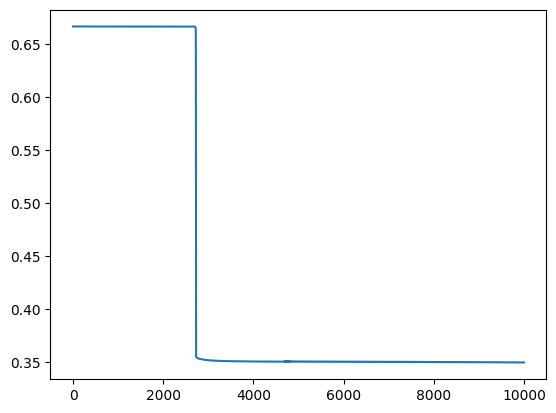

In [6]:
NN = NeuralNetwork()

err = []

for i in range(10000):
  NN.train(X,Y)
  err.append(np.mean(np.square(Y - NN.feedForward(X))))

plt.plot(err)
plt.show()

In [7]:
print(NN.feedForward([1.27, 0.0009]))

[0.99999412]


In [8]:
print(NN.feedForward([0.666,1]))

[0.06052086]
